<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy.api as sc
import seaborn as sns
import xarray as xr
import warnings
import anndata
from cemba_data.local.mc.prepare_study import prepare_study
from cemba_data.plot import *
from cemba_data.plot.preprocessing import *
from cemba_data.tools.hdf5.anndata import highly_variable_methylation_feature
from ALLCools.mcds.MCDS import MCDS
from cemba_data.tools.hdf5.anndata import rank_features_groups


/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/merge.py:18: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)
/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/dataarray.py:1829: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  'DataArray', pd.Series, pd.DataFrame, pd.Panel]:


In [2]:
result_dir = pathlib.Path()
result_dir.mkdir(exist_ok=True)
fig_dir = result_dir / 'fig'
fig_dir.mkdir(exist_ok=True)

In [3]:
brain_region = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/misc/BrainRegion.txt',
                           sep='\t', index_col='DissectionRegion')
major_region_palette = brain_region.set_index('MajorRegion')['MajorRegionColor'].to_dict()
sub_region_palette = brain_region.set_index('SubRegion')['SubRegionColor'].to_dict()
region_palette = brain_region['DissectionRegionColor'].to_dict()

In [4]:
cell_meta = pd.read_msgpack('cell_coords_and_clusters.msg')
cell_meta['MajorRegion'] = cell_meta['Region'].map(brain_region['MajorRegion'])
cell_meta['SubRegion'] = cell_meta['Region'].map(brain_region['SubRegion'])

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
coords = 'umap'

In [6]:
major_region_palette

{'Isocortex': '#176CDB', 'OLF': '#ff7f0e', 'CNU': '#7B42CD', 'HPF': '#d62728'}

Text(0.5, 1.0, 'MajorRegion')

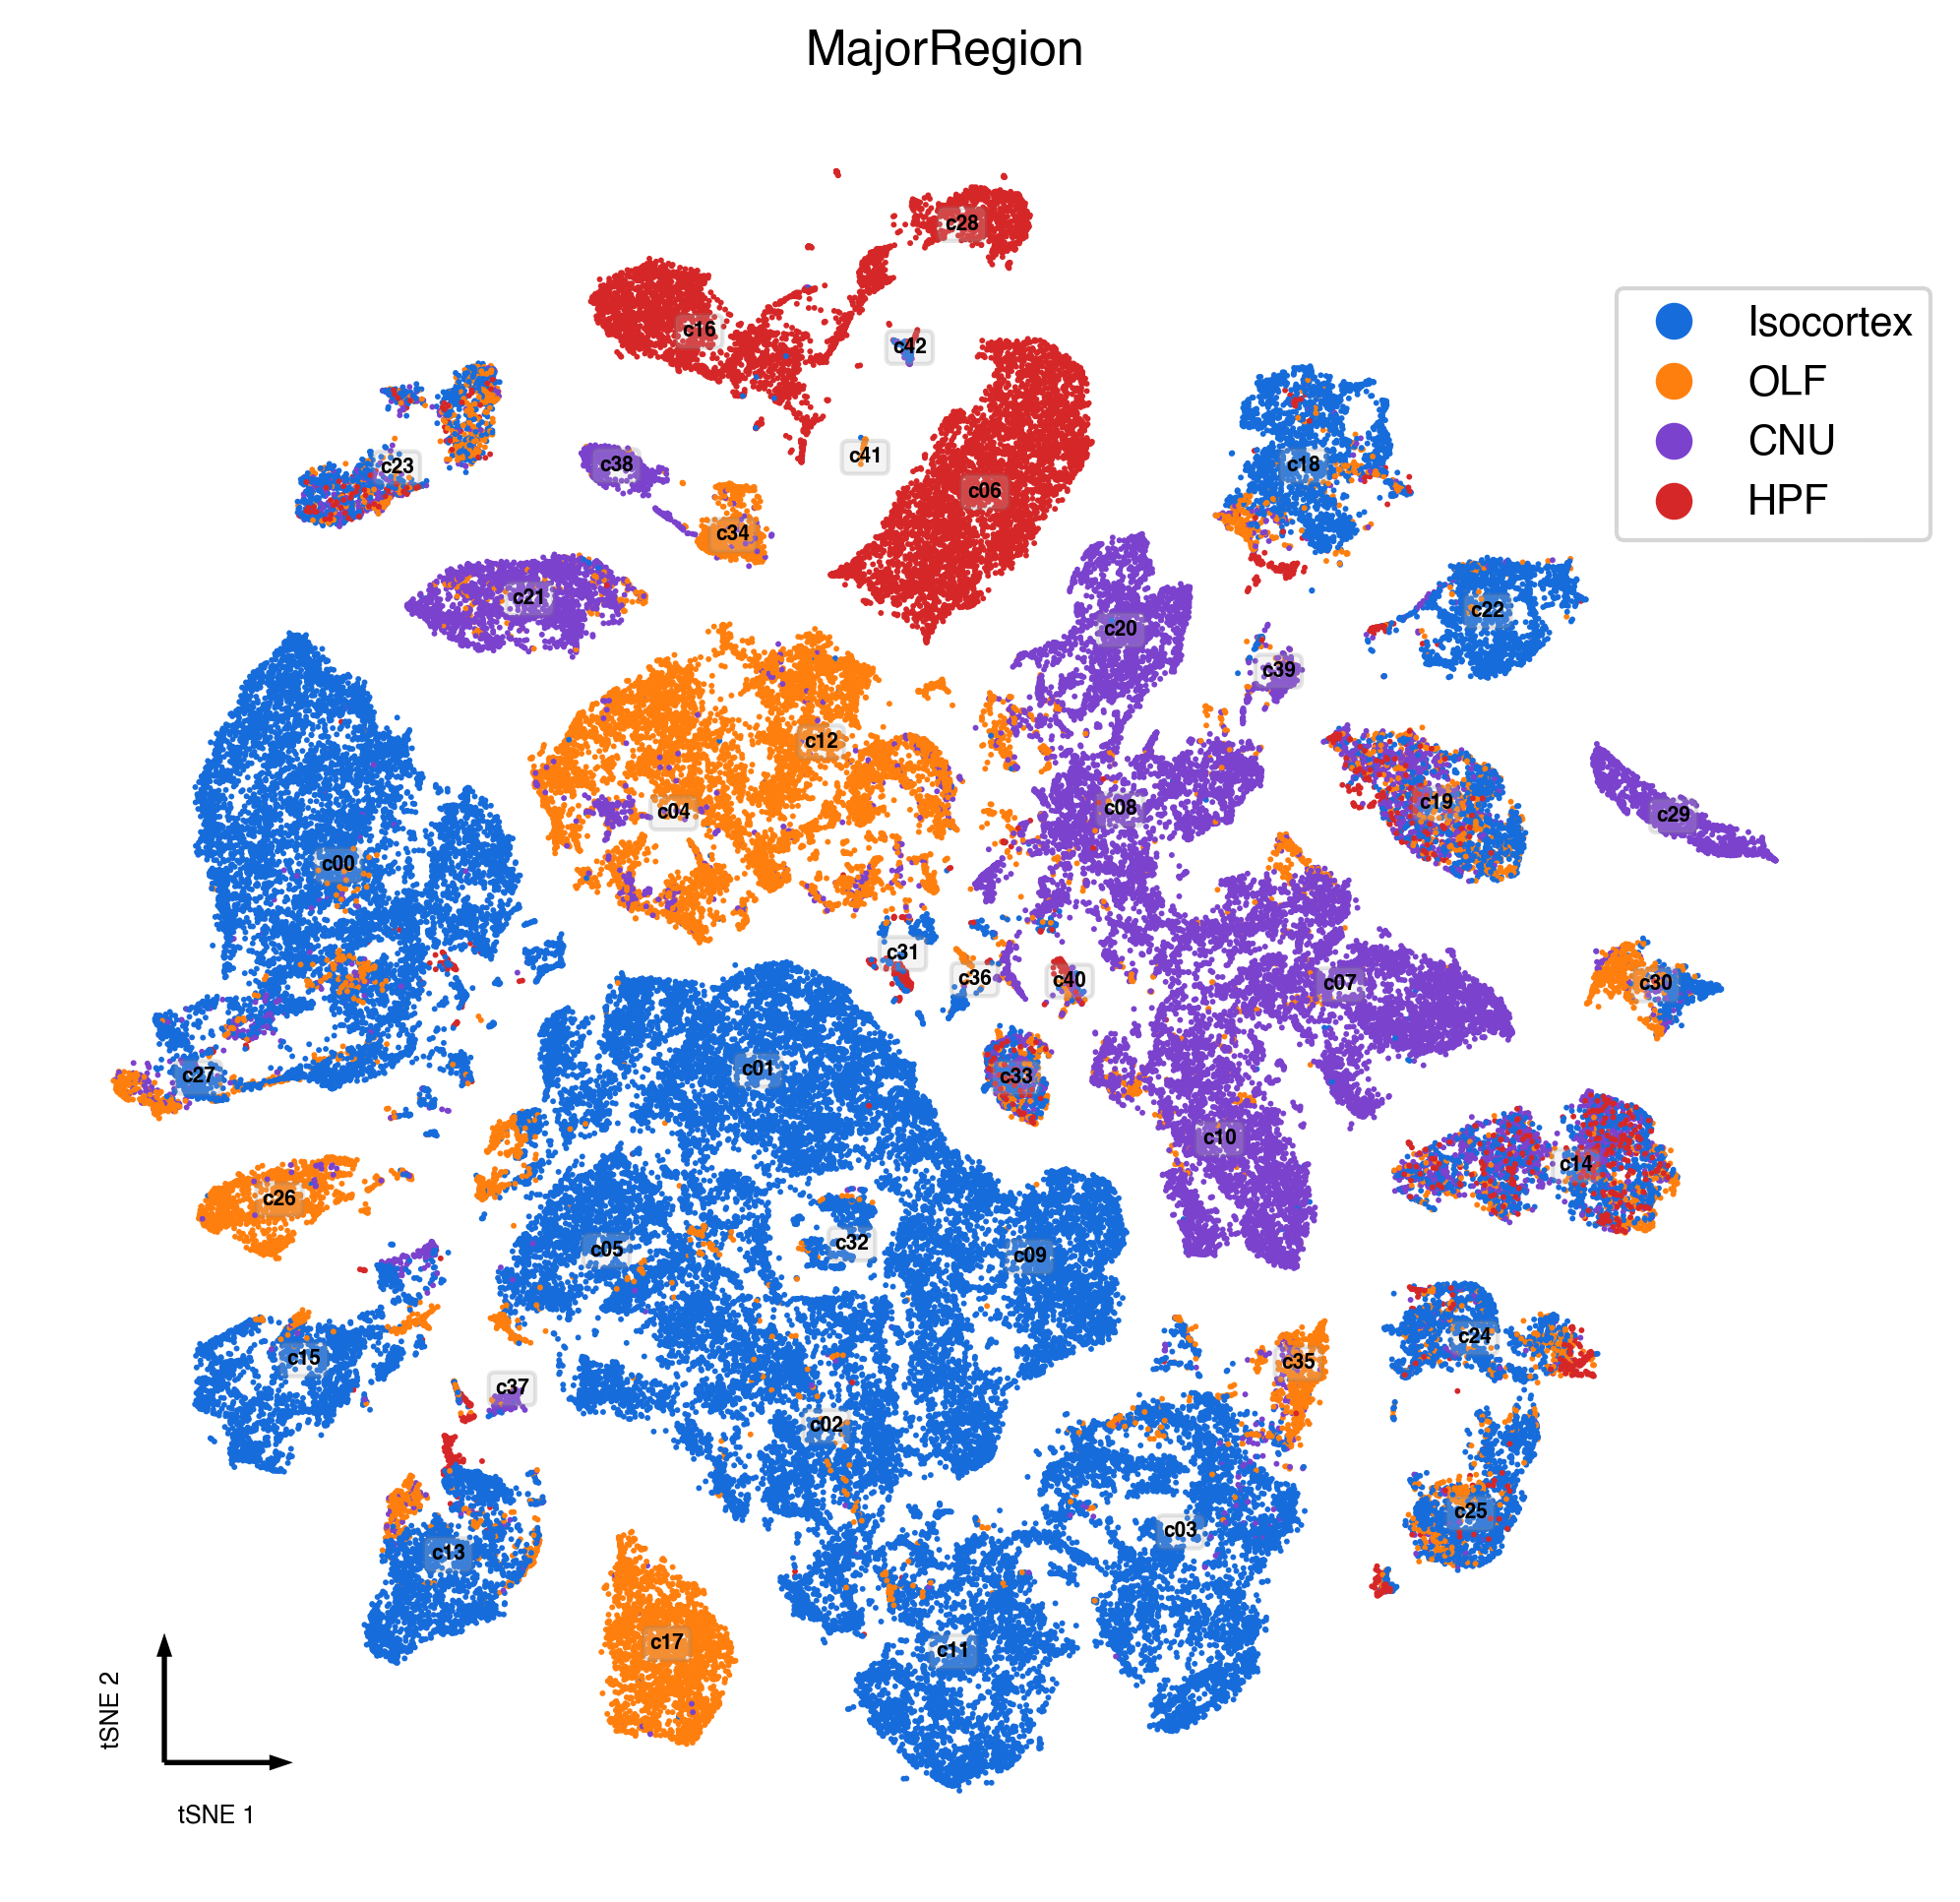

In [7]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
categorical_scatter(cell_meta, 
                    ax, 
                    coord_base='tsne', 
                    hue='MajorRegion',
                    text_anno='leiden',
                    palette=major_region_palette,
                    show_legend=True,
                    scatter_kws=dict(s=2),
                    text_anno_kws=dict(fontsize=5),
                    legend_kws=dict(bbox_to_anchor=(1.05, 0.9)),
                    max_points=None)
ax.set_title('MajorRegion')
# fig.savefig(fig_dir / f'MajorRegion_{coords}.pdf', bbox_inches='tight')

Text(0.5, 1.0, 'MajorRegion')

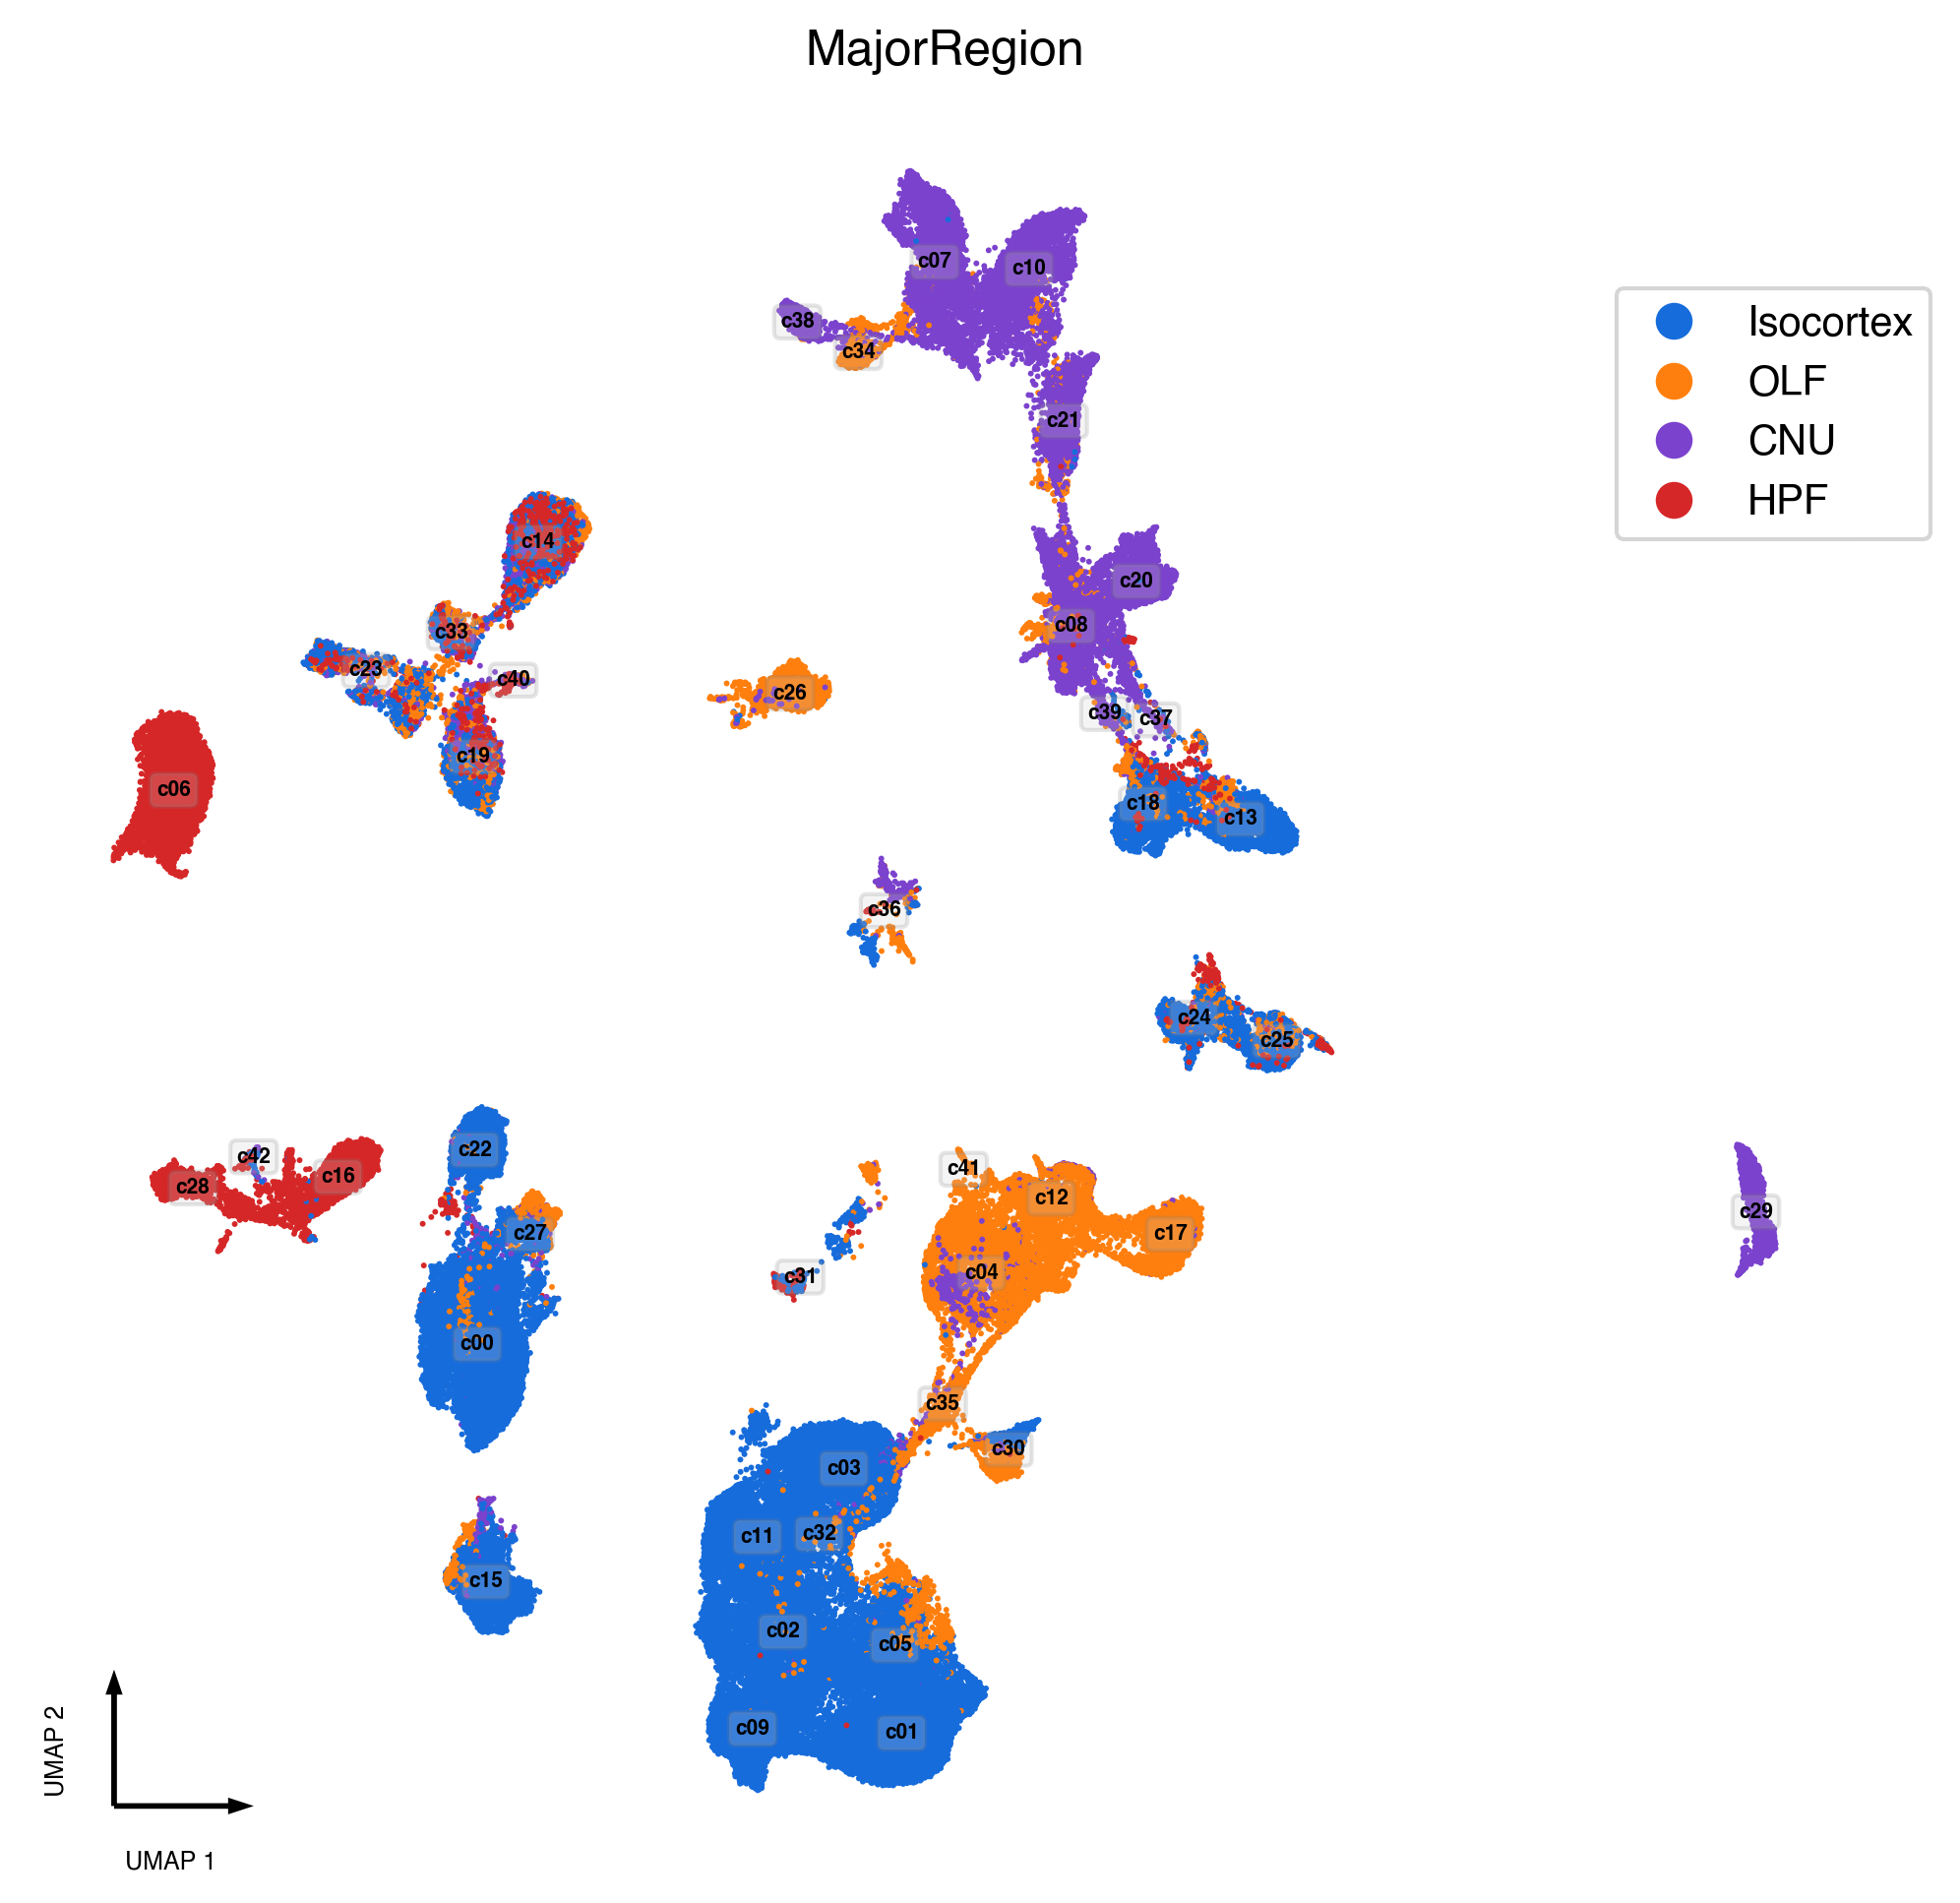

In [8]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
categorical_scatter(cell_meta, 
                    ax, 
                    coord_base=coords, 
                    hue='MajorRegion',
                    text_anno='leiden',
                    palette=major_region_palette,
                    show_legend=True,
                    scatter_kws=dict(s=2),
                    text_anno_kws=dict(fontsize=5),
                    legend_kws=dict(bbox_to_anchor=(1.05, 0.9)),
                    max_points=None)
ax.set_title('MajorRegion')
# fig.savefig(fig_dir / f'MajorRegion_{coords}.pdf', bbox_inches='tight')

In [9]:
cell_meta[cell_meta['leiden'] == 'c42']['Region'].value_counts()

4G     69
5A     26
9H     24
6A     23
4A     20
9J      4
11E     4
3A      3
11F     1
Name: Region, dtype: int64

In [10]:
major_sparation = {
    'c00': 'Exc', 'c01': 'Exc', 'c02': 'Exc', 'c03': 'Exc', 'c04': 'Exc', 'c05': 'Exc', 
    'c06': 'GC-DG', 'c07': 'Inh', 'c08': 'Inh', 'c09': 'Exc', 'c10': 'Inh', 'c11': 'Exc', 
    'c12': 'Exc', 'c13': 'Inh', 'c14': 'NonN', 'c15': 'Exc', 'c16': 'Exc-HPF', 'c17': 'Exc',
    'c18': 'Inh', 'c19': 'NonN', 'c20': 'Inh', 'c21': 'Inh', 'c22': 'Exc', 'c23': 'NonN',
    'c24': 'Inh', 'c25': 'Inh', 'c26': 'GC-OLF', 'c27': 'Exc', 'c28': 'Exc-HPF', 'c29': 'Unknown',
    'c30': 'Exc', 'c31': 'Unknown', 'c32': 'Unknown', 'c33': 'NonN', 'c34': 'Inh', 'c35': 'Exc',
    'c36': 'Unknown', 'c37': 'Inh', 'c38': 'Inh', 'c39': 'Inh', 'c40': 'NonN', 'c41': 'Exc',
    'c42': 'Exc-HPF'}
cell_meta['CellClass'] = cell_meta['leiden'].map(major_sparation)

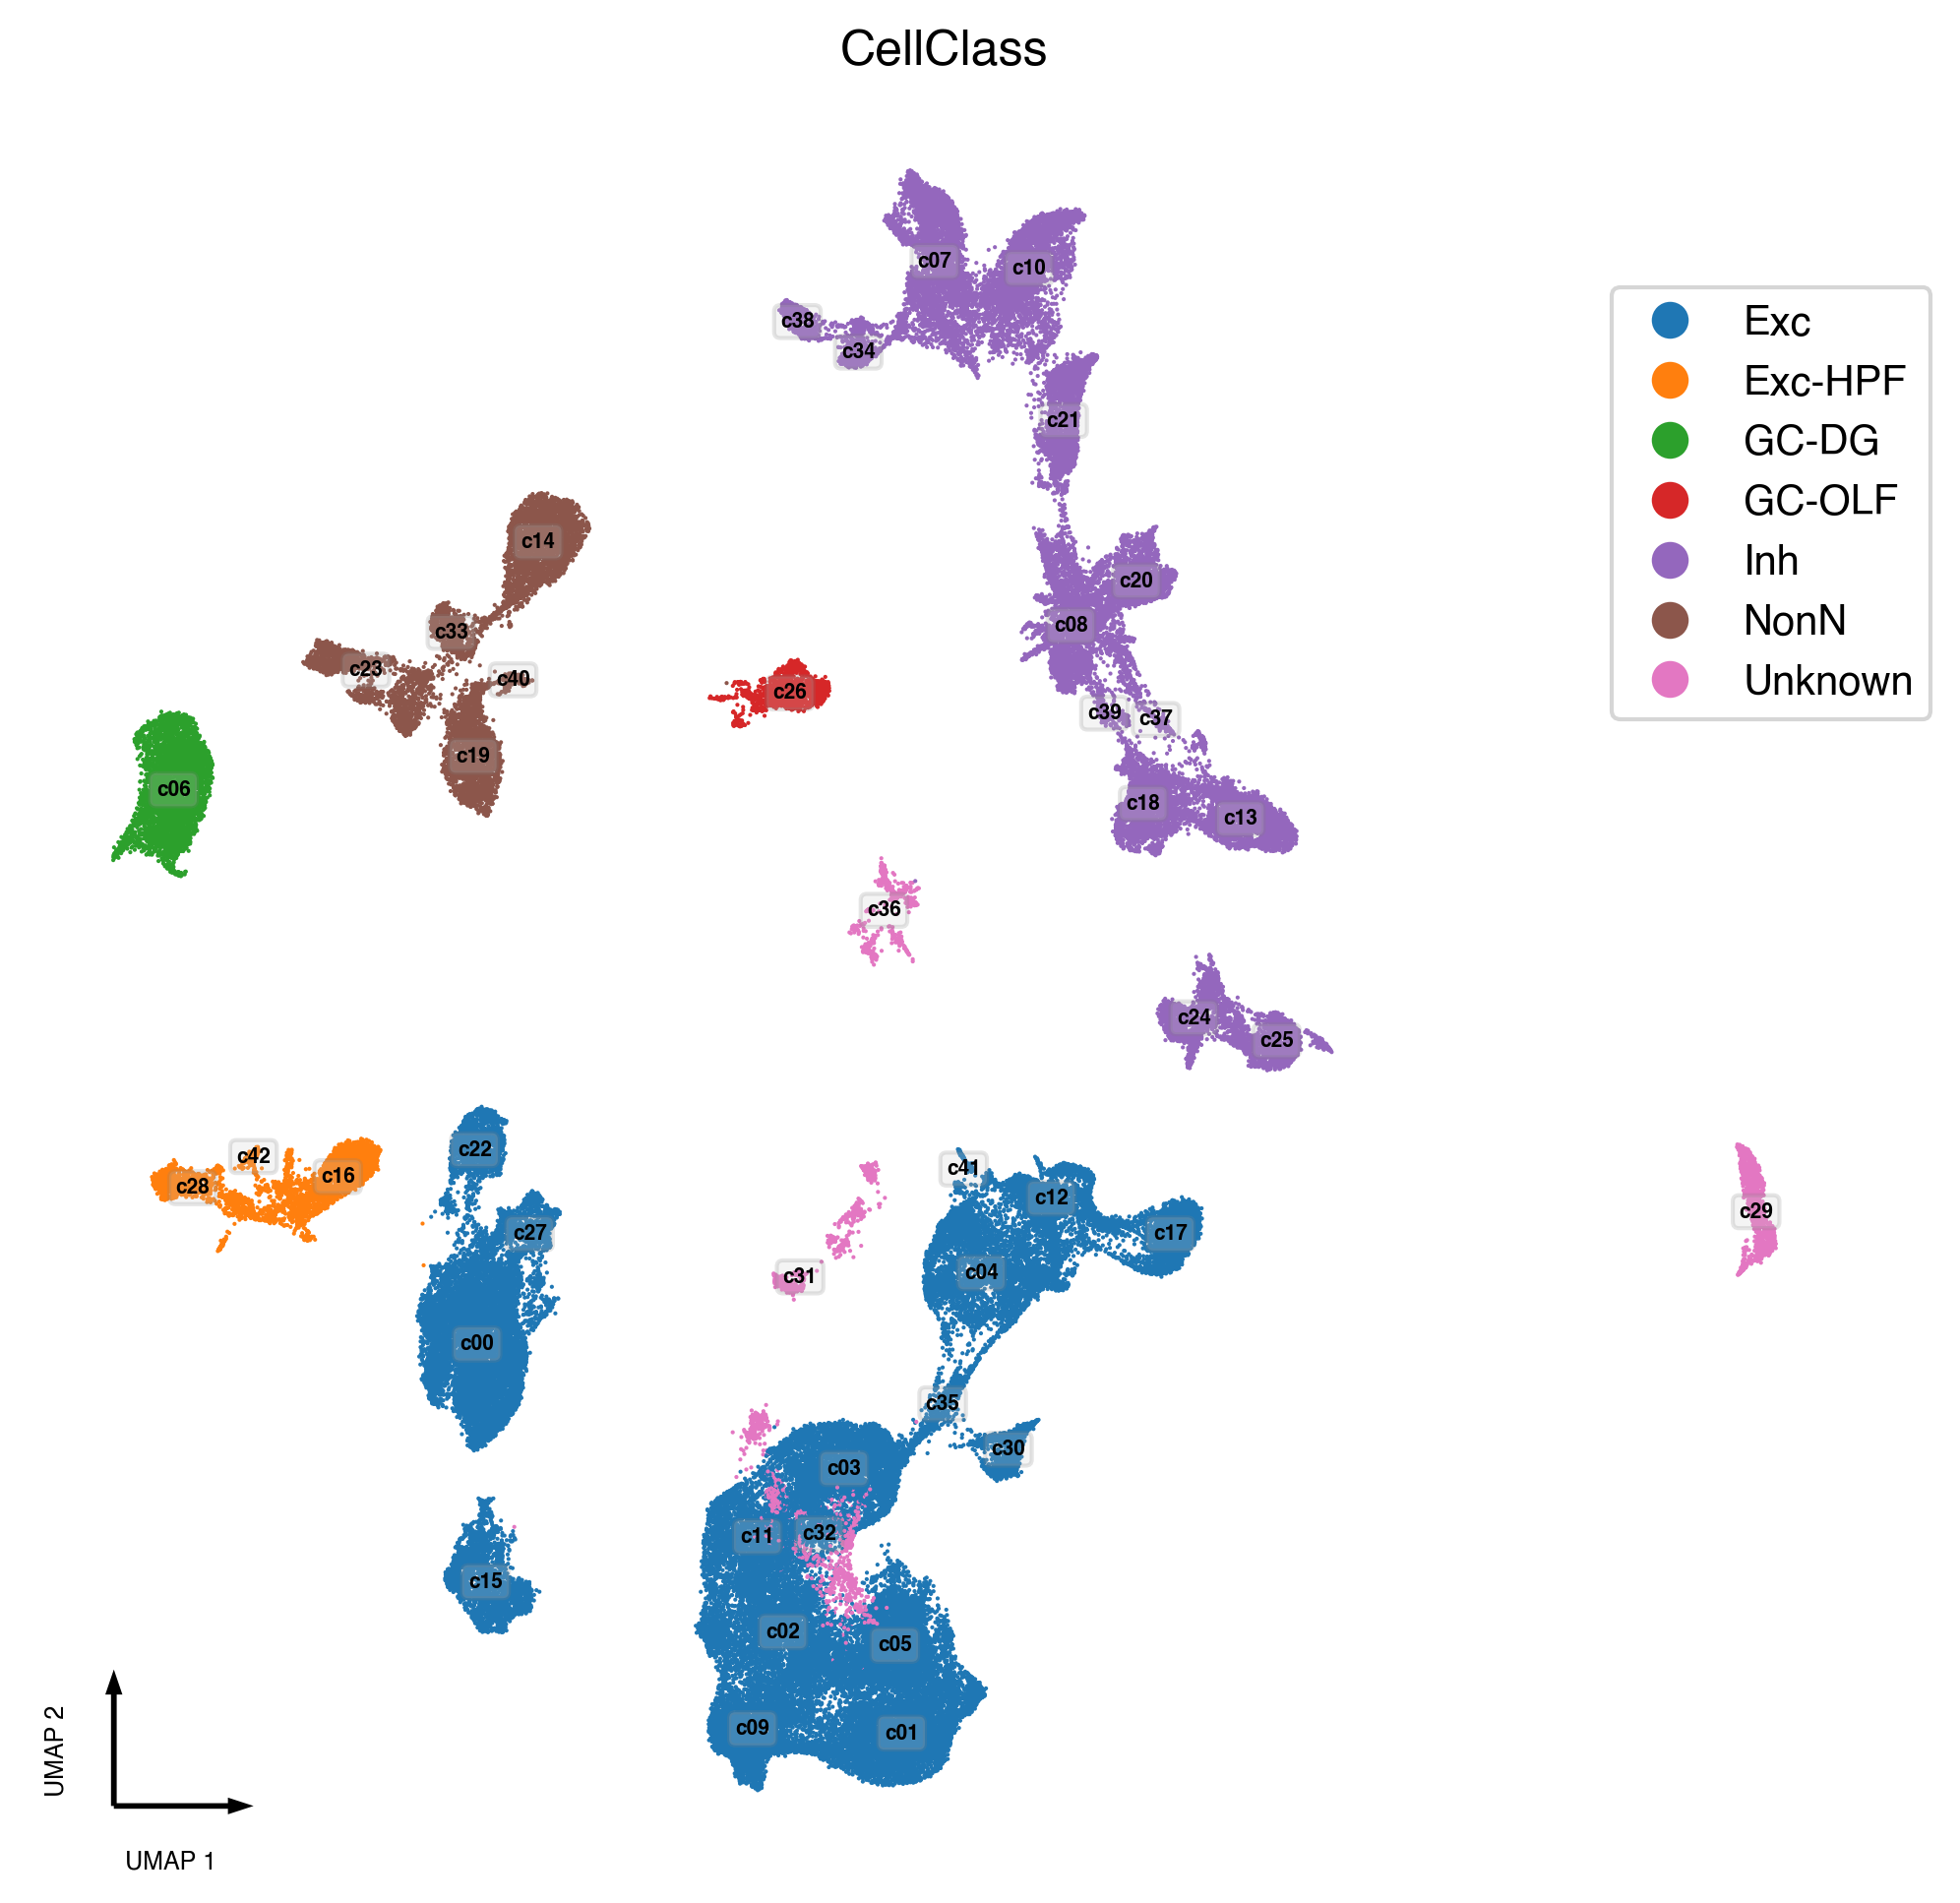

In [11]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
categorical_scatter(cell_meta, 
                    ax, 
                    coord_base=coords, 
                    hue='CellClass',
                    text_anno='leiden',
                    palette='tab10',
                    show_legend=True,
                    scatter_kws=dict(s=1),
                    text_anno_kws=dict(fontsize=5),
                    legend_kws=dict(bbox_to_anchor=(1.05, 0.9)),
                    max_points=None)
ax.set_title('CellClass')
fig.savefig(fig_dir / f'CellClass_{coords}.pdf', bbox_inches='tight')

In [12]:
cell_meta['CellClass'].value_counts()

Exc        53479
Inh        26366
NonN        7441
GC-DG       4353
Exc-HPF     4026
Unknown     3334
GC-OLF      1450
Name: CellClass, dtype: int64

In [13]:
cell_meta[cell_meta['leiden'] == 'c30']['Region'].value_counts()

3D    155
6D    152
3E     93
5G     88
6C     79
5C     71
4F     67
2D     45
4C     35
4D     28
3F     27
3C     21
5F     17
5E     16
2C     11
1B      8
2E      6
2B      4
5B      4
8B      3
7B      3
1A      2
6B      2
4E      1
9H      1
Name: Region, dtype: int64

In [14]:
cell_meta.to_msgpack(result_dir / 'cell_meta.major_separate.msg')

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: to_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  """Entry point for launching an IPython kernel.


In [15]:
cell_meta[['MajorRegion', 'SubRegion', 'CellClass']].to_msgpack('/home/hanliu/project/mouse_rostral_brain/metadata/CellAnnotation.BrainRegionAndCellClass.msg')

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: to_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  """Entry point for launching an IPython kernel.
